In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib widget

In [3]:
import matplotlib 
font = {'size'   : 12}

matplotlib.rc('font', **font)

In [4]:
def maxVal(d):
    
    a = 4.3e6 # Velocity = a * d (Hz)
    
    wV = 5e-5 # Width of AP in time (seconds)
    
    Vp = 0.05 # Height of AP (Volts)
    
    PhiP = 1000 # Height of sensitivity function (Volts/Amp)
    
    sigma = 1/0.7 # Axial conductivity (S/m)
    
    wPhi = 0.001 # Width of sensitivity function (m)
    
    
    maxval = a * d**3 *PhiP * np.pi * Vp * wPhi * wV * sigma / ( 2*np.exp(3/2)*(wPhi**2 +a**2*d**2*wV**2)**(3/2) )
    
    return maxval

In [5]:
def maxValU(d):
    
    a = 465 # Velocity = a * sqrt(d) (m^.5 Hz)
    
    wV = 2e-4 # Width of AP in time (seconds)
    
    Vp = 0.06 # Height of AP (Volts)
    
    PhiP = 1000 # Height of sensitivity function (Volts/Amp)
    
    sigma = 1 # Axial conductivity (S/m)
    
    wPhi = 0.001 # Width of sensitivity function (m)
    
    
    maxval = a * d**(5/2) *PhiP * np.pi * Vp * wPhi * wV * sigma / ( 2*np.exp(3/2)*(wPhi**2 + a**2 * d * wV**2)**(3/2) )
    
    return maxval

In [9]:
d = np.linspace(0.1,15,2000)*1e-6

In [7]:
timeMyelin = np.linspace(0,0.002,2000)
timeUnmyelin = np.linspace(0,0.1,2000)
myelinatedSeparate = np.genfromtxt('capMyelinSeparate.dat')
myelinatedTogether = np.genfromtxt('capMyelinTogether.dat')
unmyelinatedSeparate = np.genfromtxt('capUnmyelinSeparate.dat')
unmyelinatedTogether = np.genfromtxt('capUnmyelinTogether.dat')

/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/tharayil/2564967/ipykernel_18950/3095604404.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,6))


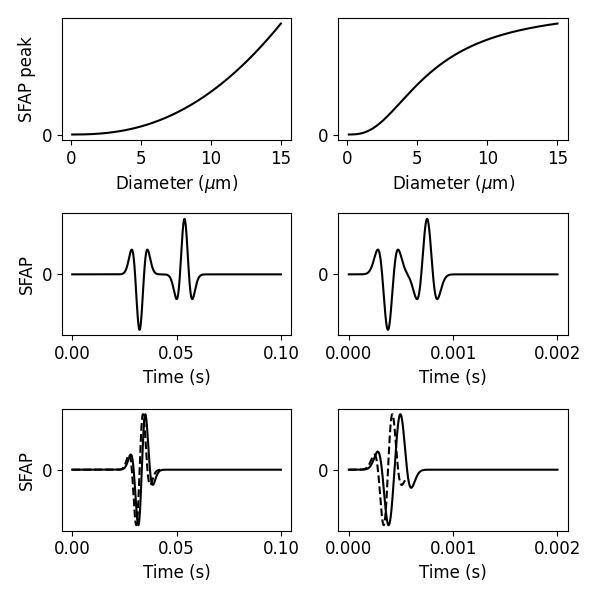

In [31]:
plt.figure(figsize=(6,6))

ax = plt.subplot(3,2,2)
plt.plot(d*1e6,maxVal(d)/np.max(maxVal(d)),'k')
ax.set_yticks([0])
plt.xlabel('Diameter ($\mu$m)')


ax = plt.subplot(3,2,1)
plt.plot(d*1e6,maxValU(d)/np.max(maxValU(d)),'k')
ax.set_yticks([0])
plt.xlabel('Diameter ($\mu$m)')
plt.ylabel('SFAP peak')

ax = plt.subplot(3,2,4)
plt.plot(timeMyelin,myelinatedSeparate[:-1]/np.max(myelinatedSeparate[:-1]),'k')
plt.xlabel('Time (s)')
ax.set_yticks([0])

derivM = np.diff(myelinatedSeparate[:570])/np.max(np.diff(myelinatedSeparate[:570]))

ax = plt.subplot(3,2,3)
plt.plot(timeUnmyelin,unmyelinatedSeparate[:-1]/np.max(unmyelinatedSeparate[:-1]),'k')
plt.ylabel('SFAP')
plt.xlabel('Time (s)')
ax.set_yticks([0])

derivU = np.diff(unmyelinatedSeparate[:850])/np.max(np.diff(unmyelinatedSeparate[:850]))

ax = plt.subplot(3,2,6)
plt.plot(timeMyelin,myelinatedTogether[:-1]/np.max(myelinatedTogether[:-1]),'k')
plt.plot(timeMyelin[1:570],derivM,'k--')
ax.set_yticks([0])
plt.xlabel('Time (s)')

ax = plt.subplot(3,2,5)
plt.plot(timeUnmyelin,unmyelinatedTogether[:-1]/np.max(unmyelinatedTogether[:-1]),'grey')
plt.plot(timeUnmyelin[1:850],derivU,'k--')
plt.xlabel('Time (s)')
plt.ylabel('SFAP')
ax.set_yticks([0])

plt.tight_layout()

plt.savefig('analyticFig.png',dpi=600)

In [53]:
unmyelinatedTogether.shape

(2001,)